# **ASSIGNMENT INTERMEDIATE & ADVANCED**

**RevoU Full Stack Data Analytics Program**

by **Yunianti Khotimah**

## **Preparation - Cleaning**

### Libraries

In [1]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

#### Silhoutte Library

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

### Import Dataset

In [3]:
# Link of given dataset
order_url = 'https://drive.google.com/file/d/1R9g5f310AA1Zmrnmd8P8jclnyToN54Bx/view?usp=sharing'
customer_url = 'https://drive.google.com/file/d/1S_BzA_P4v26oIvErtB4Ta64fQB53Hw1_/view?usp=sharing'
payment_url = 'https://drive.google.com/file/d/1JBzMoiRBy6YsxHoS3OhysRcZZyRh5DQD/view?usp=sharing'

# Link modification
order_url ='https://drive.google.com/uc?id=' + order_url.split('/')[-2]
customer_url ='https://drive.google.com/uc?id=' + customer_url.split('/')[-2]
payment_url ='https://drive.google.com/uc?id=' + payment_url.split('/')[-2]

# Reading the dataset
df_order = pd.read_csv(order_url)
df_customer = pd.read_csv(customer_url)
df_payment = pd.read_csv(payment_url)

#### View the contents of the dataset

In [4]:
# Checking order dataset
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Checking customer dataset
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Checking payment dataset
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Data Preparation & Cleaning

#### View dataset information & Check missing values
Spot missing values in "order_approved_at", "order_delivered_carrier_date", and "order_delivered_customer_date" from Order Dataset

In [7]:
print(df_order.info(), '\n')
print(df_customer.info(), '\n')
print(df_payment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 no

In [8]:
col_order = df_order.columns.to_list()
col_null = col_order[4:7]
print("Identify missing value in df_order")
print("There are", len(df_order[df_order[col_null].isnull().sum(axis=1) > 0]["order_status"]), "rows of missing values")
print(df_order[df_order[col_null].isnull().sum(axis=1) > 0]["order_status"].value_counts())
print("\nIdentify the non-missing value in df_order")
print(df_order[df_order[col_null].isnull().sum(axis=1) == 0]["order_status"].value_counts())

Identify missing value in df_order
There are 2980 rows of missing values
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

Identify the non-missing value in df_order
delivered    96455
canceled         6
Name: order_status, dtype: int64


From result above, we know that the missing values are mostly undelivered orders. Hence, I choose to drop them (focus on the delivered orders). 

The non-missing data (have deliver date) but has order_status canceled will be also dropped, because those are invalid data.

In [9]:
df_order.dropna(axis=0, inplace=True)
idx_drop = df_order[df_order['order_status']=='canceled'].index.to_list()
df_order.drop(index=idx_drop, inplace=True)
print(df_order.info(), "\n")
print(df_order['order_status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB
None 

delivered    96455
Name: order_status, dtype: int64


#### Check Duplicate (The ID must unique)
There are duplicated order_id in payment data

In [10]:
print("Duplicated order data = ", df_order.duplicated().sum())
print("Duplicated customer data = ", df_customer.duplicated().sum())
print("Duplicated payment data = ", df_payment.duplicated().sum())

Duplicated order data =  0
Duplicated customer data =  0
Duplicated payment data =  0


In [11]:
print("Duplicated order_id in order data = ", df_order['order_id'].duplicated().sum())
print("Duplicated customer_id in customer data = ", df_customer['customer_id'].duplicated().sum())
print("Duplicated order_id in payment data = ", df_payment['order_id'].duplicated().sum())

Duplicated order_id in order data =  0
Duplicated customer_id in customer data =  0
Duplicated order_id in payment data =  4446


In [12]:
df_payment[df_payment['order_id'].duplicated(keep=False)].sort_values(by=['order_id'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
...,...,...,...,...,...
21648,ffa1dd97810de91a03abd7bd76d2fed1,2,voucher,1,418.73
32912,ffa39020fe7c8a3e907320e1bec4b985,1,credit_card,1,7.13
3009,ffa39020fe7c8a3e907320e1bec4b985,2,voucher,1,64.01
75188,ffc730a0615d28ec19f9cad02cb41442,1,credit_card,1,14.76


The payment_type of duplicated order_id --> create new columns (one hot encoding) to represent the various payment type chosen by customers, then sum them (grouping)

While total payment_value of duplicated order_id will be the sum of them (grouping)

In [13]:
df_dummy = pd.get_dummies(df_payment, columns=['payment_type'], prefix=['payment_type'])
df_dummy.drop(columns=['payment_type_not_defined'], inplace=True)

df_payment_2 = df_dummy.groupby(['order_id']).sum()
df_payment_2.drop(columns=['payment_sequential', 'payment_installments'], inplace=True)
df_payment_2 = df_payment_2.reset_index()
df_payment_2

,order_id,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,0,1,0,0
1,00018f77f2f0320c557190d7a144bdd3,259.83,0,1,0,0
2,000229ec398224ef6ca0657da4fc703e,216.87,0,1,0,0
3,00024acbcdf0a6daa1e931b038114c75,25.78,0,1,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,0,1,0,0
...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,1,0,0,0
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,1,0,0,0
99437,fffce4705a9662cd70adb13d4a31832d,116.85,0,1,0,0
99438,fffe18544ffabc95dfada21779c9644f,64.71,0,1,0,0


In [14]:
print("Duplicated payment data = ", df_payment_2.duplicated().sum())
print("Duplicated order_id in payment data = ", df_payment_2['order_id'].duplicated().sum())

Duplicated payment data =  0
Duplicated order_id in payment data =  0


#### Check cross-field

In [15]:
A = df_order['order_purchase_timestamp'] <= df_order['order_approved_at']
B = df_order['order_approved_at'] <= df_order['order_delivered_carrier_date'] 
C = df_order['order_delivered_carrier_date'] <= df_order['order_delivered_customer_date']
cross_field = ~(A & B & C)
print("There are", cross_field.sum(), "invalid data")
print("The order must be customer purchase --> payment approved --> delivered by carrier --> delivered to customer")

There are 1373 invalid data
The order must be customer purchase --> payment approved --> delivered by carrier --> delivered to customer


In [16]:
print("From", len(df_order), "data")
idx_drop = df_order[cross_field].index.to_list()
df_order.drop(index=idx_drop, inplace=True)
print("There are", len(df_order), "data remaining")

From 96455 data
There are 95082 data remaining


In [17]:
A = df_order['order_purchase_timestamp'] <= df_order['order_approved_at']
B = df_order['order_approved_at'] <= df_order['order_delivered_carrier_date'] 
C = df_order['order_delivered_carrier_date'] <= df_order['order_delivered_customer_date']
cross_field = ~(A & B & C)
print("There are", cross_field.sum(), "invalid data after dropping")

There are 0 invalid data after dropping


#### Check data range & Identify outliers

##### Payment value

In [18]:
df_payment_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99440 non-null  object 
 1   payment_value             99440 non-null  float64
 2   payment_type_boleto       99440 non-null  uint8  
 3   payment_type_credit_card  99440 non-null  uint8  
 4   payment_type_debit_card   99440 non-null  uint8  
 5   payment_type_voucher      99440 non-null  uint8  
dtypes: float64(1), object(1), uint8(4)
memory usage: 1.9+ MB


[Text(0.5, 0, 'payment_value'),
 Text(0.5, 1.0, 'Check outliers on payment value')]

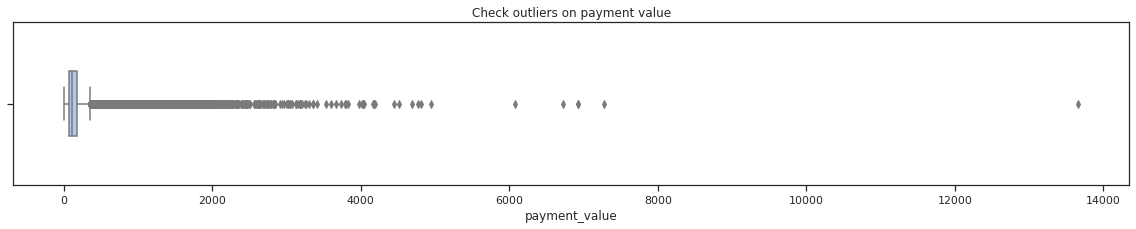

In [19]:
sns.set_theme(style="ticks", palette="pastel")
f, ax = plt.subplots(figsize=(20, 3))
ax = sns.boxplot(x=df_payment_2['payment_value'], width=0.4)
ax.set(title="Check outliers on payment value", xlabel="payment_value")

In [20]:
Q1 = df_payment_2['payment_value'].quantile(0.25)
Q3 = df_payment_2['payment_value'].quantile(0.75)
IQR = Q3 - Q1
limit_up = Q3 + 1.5*IQR
limit_down = Q1 - 1.5*IQR
print("Limit atas =", limit_up, "& Limit bawah =", limit_down)

outlier_up = df_payment_2['payment_value'] > limit_up
outlier_down = df_payment_2['payment_value'] < limit_down
outlier = (outlier_up | outlier_down)
print("Total terdapat", outlier.sum(), "outliers dari", len(df_payment_2), "data")

Limit atas = 349.40999999999997 & Limit bawah = -110.43
Total terdapat 7866 outliers dari 99440 data


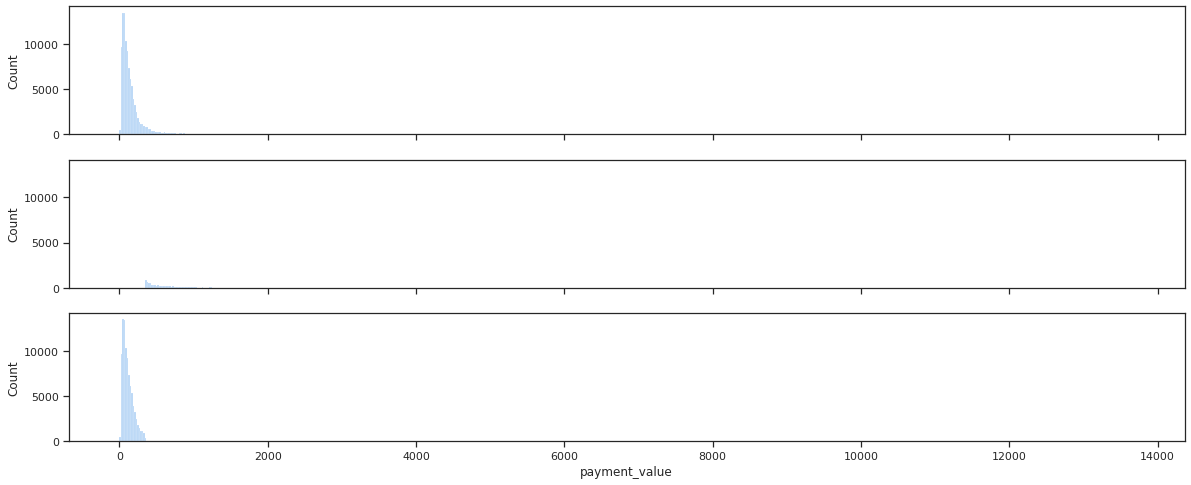

In [21]:
f, axs = plt.subplots(3, 1, figsize=(20, 8), sharex=True, sharey=True)
sns.histplot(ax=axs[0], data=df_payment_2, x="payment_value", binwidth=20)
sns.histplot(ax=axs[1], data=df_payment_2[outlier], x="payment_value", binwidth=20)
sns.histplot(ax=axs[2], data=df_payment_2[~outlier], x="payment_value", binwidth=20)

I decided to drop the outliers (7866 rows of data) because it's rare for customers to spend money more than 350 per orders (we analyze the normal behavior of customers)

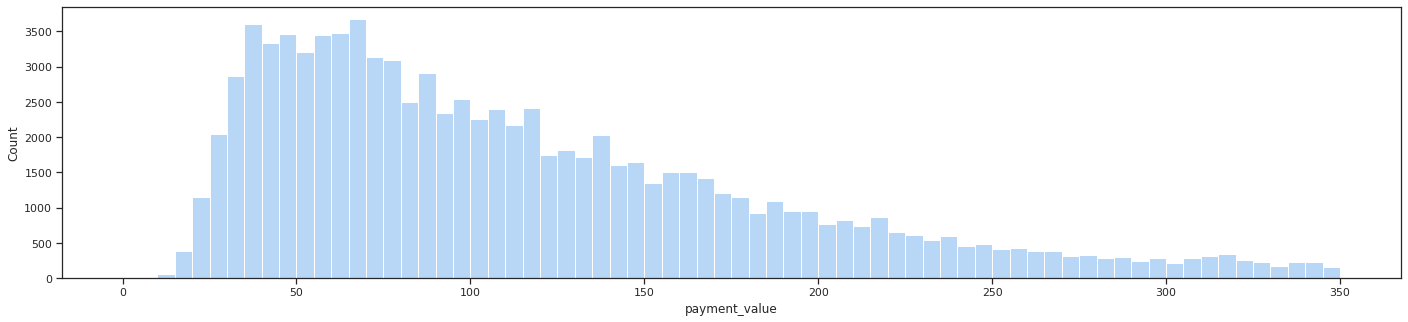

In [22]:
idx_outlier = df_payment_2[outlier].index.to_list()
df_payment_2.drop(index=idx_outlier, inplace=True)

f, ax = plt.subplots(figsize=(24, 5))
sns.histplot(data=df_payment_2, x="payment_value", binwidth=5)

##### Actual Delivery Time

In [23]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95082 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       95082 non-null  object
 1   customer_id                    95082 non-null  object
 2   order_status                   95082 non-null  object
 3   order_purchase_timestamp       95082 non-null  object
 4   order_approved_at              95082 non-null  object
 5   order_delivered_carrier_date   95082 non-null  object
 6   order_delivered_customer_date  95082 non-null  object
 7   order_estimated_delivery_date  95082 non-null  object
dtypes: object(8)
memory usage: 6.5+ MB


In [24]:
col_order = df_order.columns.to_list()
col_date = col_order[3:]
for cd in col_date:
  # df_order[cd] = df_order[cd].dt.strftime('%Y-%m-%d')
  df_order[cd] = pd.to_datetime(df_order[cd])
print(df_order.info(), "\n")
df_order[col_date]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95082 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95082 non-null  object        
 1   customer_id                    95082 non-null  object        
 2   order_status                   95082 non-null  object        
 3   order_purchase_timestamp       95082 non-null  datetime64[ns]
 4   order_approved_at              95082 non-null  datetime64[ns]
 5   order_delivered_carrier_date   95082 non-null  datetime64[ns]
 6   order_delivered_customer_date  95082 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95082 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.5+ MB
None 



,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...
99436,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


[Text(0.5, 0, 'delivery time (days)'),
 Text(0.5, 1.0, 'Check outliers on delivery time')]

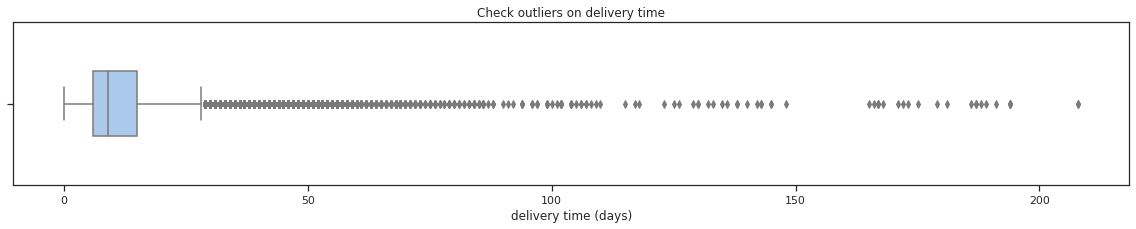

In [25]:
df_order['actual_delivery_time'] = (df_order['order_delivered_customer_date'] - df_order['order_approved_at']).dt.days

f, ax = plt.subplots(figsize=(20, 3))
ax = sns.boxplot(x=df_order['actual_delivery_time'], width=0.4)
ax.set(title="Check outliers on delivery time", xlabel="delivery time (days)")

In [26]:
Q1 = df_order['actual_delivery_time'].quantile(0.25)
Q3 = df_order['actual_delivery_time'].quantile(0.75)
IQR = Q3 - Q1
limit_up = Q3 + 1.5*IQR
limit_down = Q1 - 1.5*IQR
print("Limit atas =", limit_up, "& Limit bawah =", limit_down)

outlier_up = df_order['actual_delivery_time'] > limit_up
outlier_down = df_order['actual_delivery_time'] < limit_down
outlier = (outlier_up | outlier_down)
print("Total terdapat", outlier.sum(), "kandidat outliers dari", len(df_order), "data")

Limit atas = 28.5 & Limit bawah = -7.5
Total terdapat 4758 kandidat outliers dari 95082 data


Text(0.5, 1.0, 'Histogram of data without outliers')

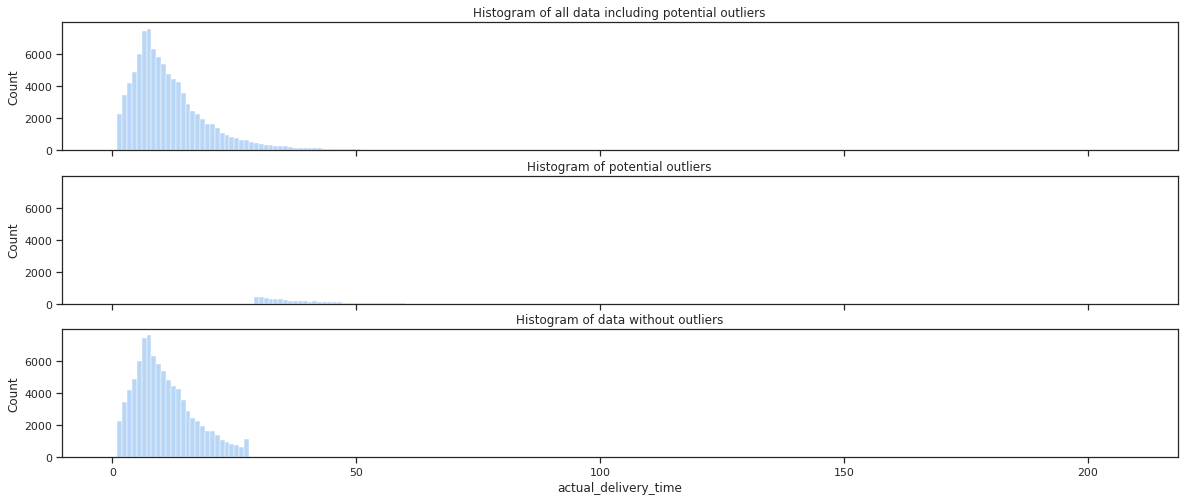

In [27]:
f, axs = plt.subplots(3, 1, figsize=(20, 8), sharex=True, sharey=True)
sns.histplot(ax=axs[0], data=df_order, x="actual_delivery_time", binwidth=1)
axs[0].set_title("Histogram of all data including potential outliers")
sns.histplot(ax=axs[1], data=df_order[outlier], x="actual_delivery_time", binwidth=1)
axs[1].set_title("Histogram of potential outliers")
sns.histplot(ax=axs[2], data=df_order[~outlier], x="actual_delivery_time", binwidth=1)
axs[2].set_title("Histogram of data without outliers")

I decided to remove those outliers. 

But from these there's an important thing to notice that the existence of these outliers could be due to incorrect date input or there's flaw in our delivery system. Further investigation should be done to know the exact reason.

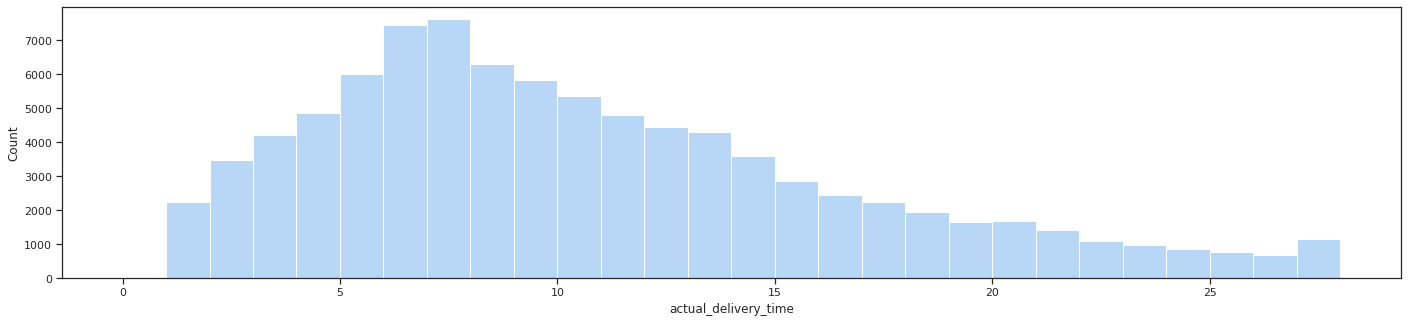

In [28]:
idx_outlier = df_order[outlier].index.to_list()
df_order.drop(index=idx_outlier, inplace=True)

f, ax = plt.subplots(figsize=(24, 5))
sns.histplot(data=df_order, x="actual_delivery_time", binwidth=1)

#### Remove irrelevant column(s)
We'll remove irrelevant column(s) as our analysis focus on these
1.   Number of orders per month
2.   Daily orders trend
3.   Percentage of orders per payment type
4.   Customer segmentation (cluster analysis)

In [29]:
df_order_cleaned = df_order.copy()
df_customer_cleaned = df_customer.copy()
df_payment_cleaned = df_payment_2.copy()

df_order_cleaned.drop(columns=['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date'], inplace=True)
df_customer_cleaned.drop(columns=['customer_unique_id', 'customer_zip_code_prefix'], inplace=True)

df_order_cleaned.info()
print('/n')
df_customer_cleaned.info()
print('/n')
df_payment_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90324 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       90324 non-null  object        
 1   customer_id                    90324 non-null  object        
 2   order_purchase_timestamp       90324 non-null  datetime64[ns]
 3   order_delivered_customer_date  90324 non-null  datetime64[ns]
 4   actual_delivery_time           90324 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 6.2+ MB
/n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_city   99441 non-null  object
 2   customer_state  99441 non-null  object
dtypes: object(3)
memor

#### Join/Merge the dataset

In [30]:
df = df_order_cleaned.merge(df_customer_cleaned, on='customer_id', copy=False)
df = df.merge(df_payment_cleaned, on='order_id', copy=False)
print(df.info(), "\n")
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83444 entries, 0 to 83443
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       83444 non-null  object        
 1   customer_id                    83444 non-null  object        
 2   order_purchase_timestamp       83444 non-null  datetime64[ns]
 3   order_delivered_customer_date  83444 non-null  datetime64[ns]
 4   actual_delivery_time           83444 non-null  int64         
 5   customer_city                  83444 non-null  object        
 6   customer_state                 83444 non-null  object        
 7   payment_value                  83444 non-null  float64       
 8   payment_type_boleto            83444 non-null  uint8         
 9   payment_type_credit_card       83444 non-null  uint8         
 10  payment_type_debit_card        83444 non-null  uint8         
 11  payment_type_vo

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,actual_delivery_time,customer_city,customer_state,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,8,sao paulo,SP,38.71,0,1,0,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,12,barreiras,BA,141.46,1,0,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,9,vianopolis,GO,179.12,0,1,0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,13,sao goncalo do amarante,RN,72.20,0,1,0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,2,santo andre,SP,28.62,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
83439,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,2017-02-23 09:05:12,2017-03-06 11:08:08,11,sao paulo,SP,155.99,0,1,0,0
83440,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,8,sao jose dos campos,SP,85.08,0,1,0,0
83441,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-28 17:37:56,22,praia grande,SP,195.00,0,1,0,0
83442,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-21 11:24:17,24,nova vicosa,BA,271.01,0,1,0,0


## **Analysis**

### **EDA**

**Insight:**

* Avg customer spending is 114 local currency per order
* Avg delivery time is 10 days (received by customer)
* Both variable has similar distribution (positive skew)

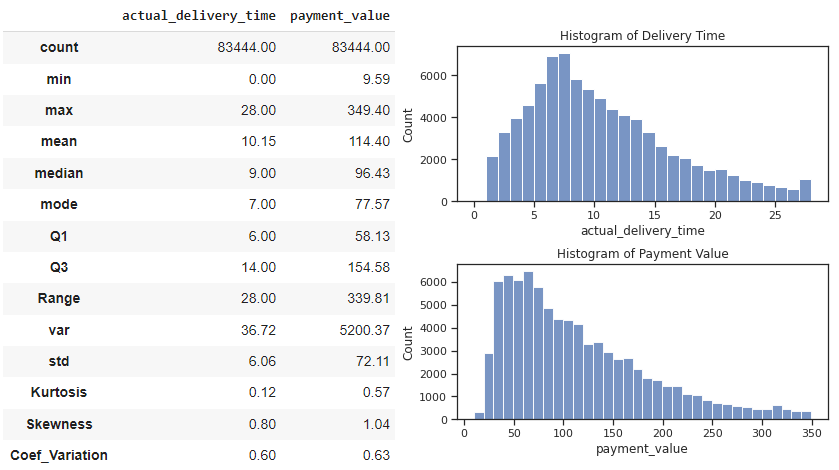



In [31]:
import statistics as stat
from scipy.stats import kurtosis, skew

def Q1(x):
  return x.quantile(0.25)
def Q3(x):
  return x.quantile(0.75)
def Range(x):
  return x.max() - x.min()
def CoefVariation(x):
  return np.std(x)/np.mean(x)

col_num = ['actual_delivery_time', 'payment_value']
k = kurtosis(df[col_num])
s = skew(df[col_num])
cv = CoefVariation(df[col_num])
kurt_skew = {'actual_delivery_time': [k[0], s[0], cv[0]], 'payment_value': [k[1], s[1], cv[1]]}
kurt_skew = pd.DataFrame(kurt_skew, index=['Kurtosis', 'Skewness', 'Coef_Variation'])

desc_name = ['count', 'min', 'max', 'mean', 'median', stat.mode, Q1, Q3, Range, np.var, np.std]
desc_analysis = df[col_num].agg(desc_name)
desc_analysis = round(desc_analysis.append(kurt_skew),2)
desc_analysis

,actual_delivery_time,payment_value
count,83444.00,83444.00
min,0.00,9.59
max,28.00,349.40
mean,10.15,114.40
median,9.00,96.43
mode,7.00,77.57
Q1,6.00,58.13
Q3,14.00,154.58
Range,28.00,339.81
var,36.72,5200.37


In [32]:
col_pay = ['payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher']
round(df[col_pay].describe(), 2)

,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
count,83444.0,83444.00,83444.00,83444.00
mean,0.2,0.77,0.02,0.06
std,0.4,0.43,0.12,0.41
min,0.0,0.00,0.00,0.00
25%,0.0,1.00,0.00,0.00
50%,0.0,1.00,0.00,0.00
75%,0.0,1.00,0.00,0.00
max,1.0,2.00,2.00,25.00


In [33]:
col_obj = ['customer_city', 'customer_state']
df[col_obj].describe()

,customer_city,customer_state
count,83444,83444
unique,3815,27
top,sao paulo,SP
freq,13715,36887


Text(0.5, 1.0, 'Histogram of Payment Value')

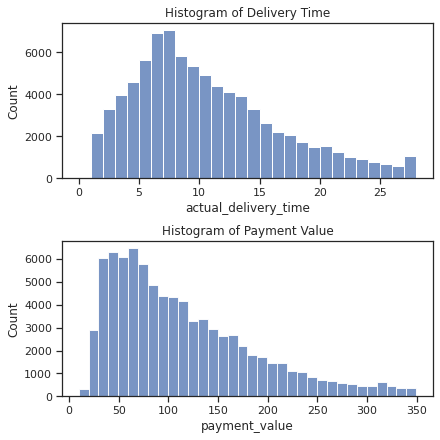

In [38]:
sns.set_theme(style="ticks")
f, axs = plt.subplots(2, 1, figsize=(6, 6), constrained_layout=True)
sns.histplot(df, x=col_num[0], binwidth=1, ax=axs[0])
sns.histplot(df, x=col_num[1], binwidth=10, ax=axs[1])

axs[0].set_title("Histogram of Delivery Time")
axs[1].set_title("Histogram of Payment Value")

### **1. Number of Orders per Month**

**Insight:**

* Number of orders are increasing month by month (uptrend)
* The peak was achieved on November 2017 around 6000 orders
* For this year (2018) the orders are quite stable around 5000-6000 orders/month


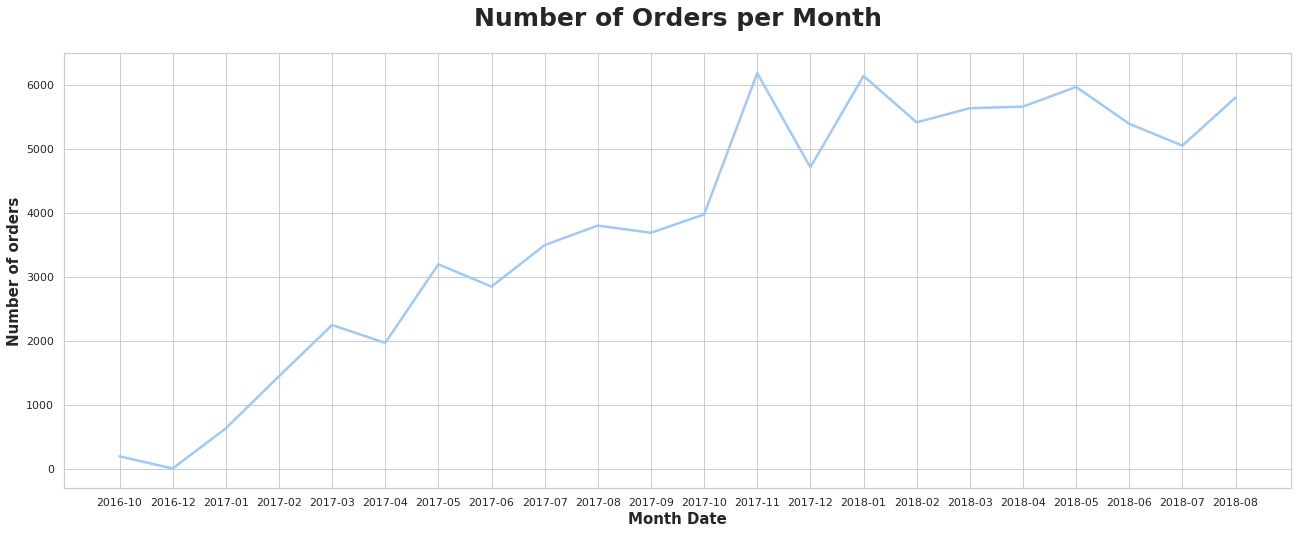

In [ ]:
grouped_month = df.copy()
grouped_month['month'] = grouped_month['order_purchase_timestamp'].dt.strftime('%Y-%m')
grouped_month = grouped_month[['month', 'order_id']]
grouped_month = grouped_month.groupby(by=['month'], as_index=False).count()
grouped_month

,month,order_id
0,2016-10,192
1,2016-12,1
2,2017-01,629
3,2017-02,1444
4,2017-03,2246
5,2017-04,1966
6,2017-05,3195
7,2017-06,2847
8,2017-07,3496
9,2017-08,3800


Text(0.5, -0.3, 'Month Date')

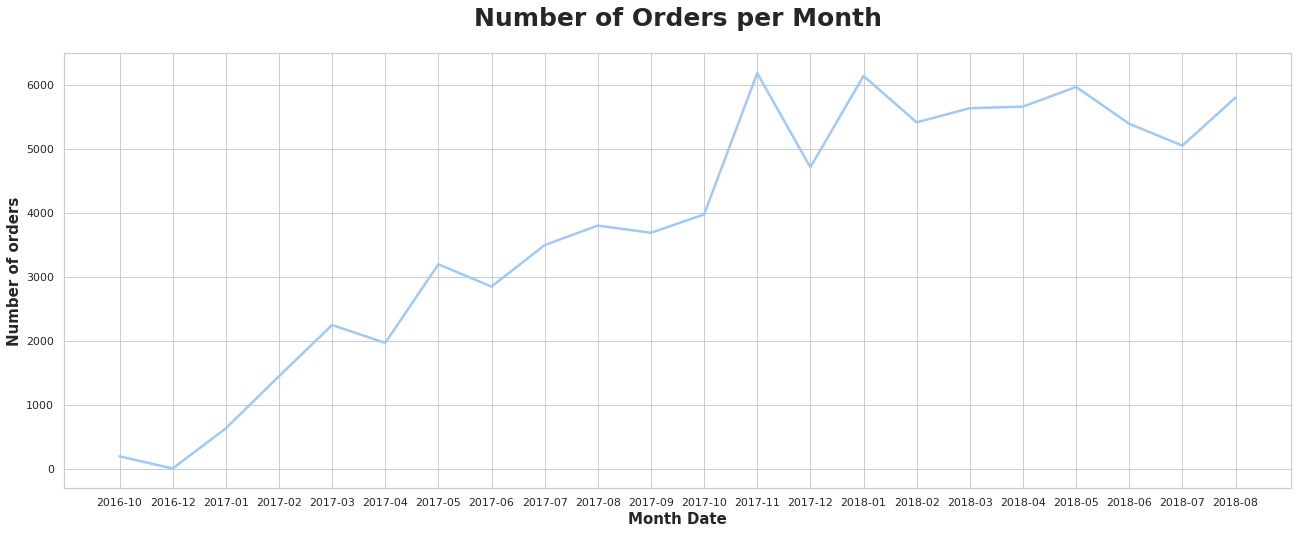

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
f, ax = plt.subplots(figsize=(22, 8))
sns.lineplot(x="month", y="order_id", data=grouped_month, linewidth=2.5)

ax.set_title("Number of Orders per Month", fontsize=25, fontweight='bold', position=(0.5,1.05))
ax.set_ylabel("Number of orders",fontsize=15, fontweight='bold', position=(-0.1,0.5))
ax.set_xlabel("Month Date",fontsize=15, fontweight='bold', position=(0.5,-0.3))


* Monthly number of orders --> positive trend 

* The highest number of orders was achieved in Novemeber 2017

* Currently, the number of orders (Jan-Aug 2018) is quite stable around 5000-6000 orders/month

### **2. Daily orders trend**

**Insight:**

* There's sudden peak of orders on Friday week 47th, it happened on 24 November 2017 which was a Black Friday (marks the start of the Christmas shopping season, stores offer highly promoted sales)
* The busiest day of the week is on Monday (based on average daily orders) with average 157 orders/day

**Recommendation:**

* Each year, the peak of promotion should be done on Black Friday
* While for normal days in a week, it's preferable to do promotion on Monday-Tuesday

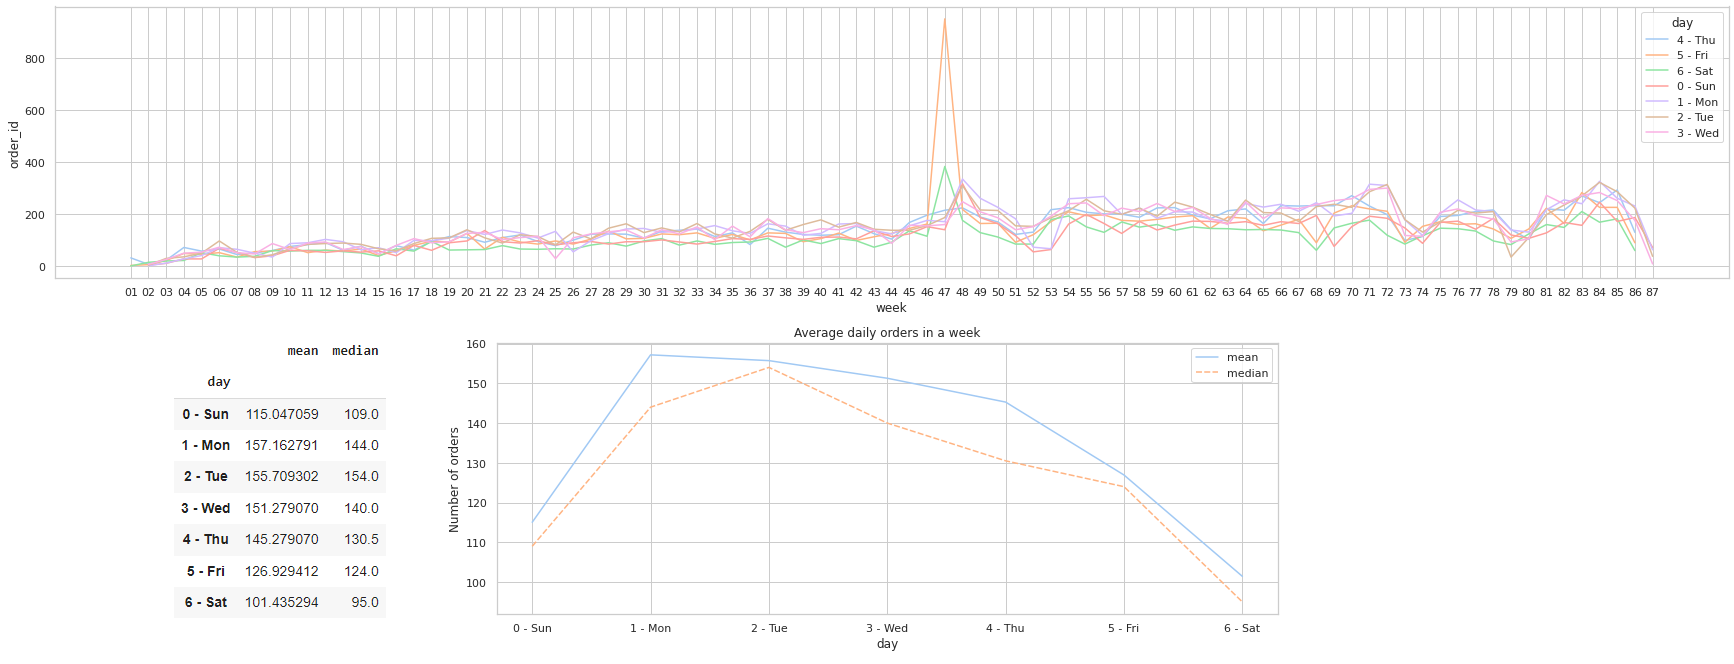

#### Separated 2017 & 2018

In [39]:
df_daily = df.copy()
df_daily['year'] = df_daily['order_purchase_timestamp'].dt.strftime('%Y')
df_daily = df_daily[df_daily['year']!='2016']
df_daily['week'] = df_daily['order_purchase_timestamp'].dt.strftime('%U')
df_daily['day'] = df_daily['order_purchase_timestamp'].dt.strftime('%w - %a')
df_17 = pd.pivot_table(df_daily[df_daily['year']=='2017'], values='order_id', index='week', columns='day', aggfunc={'order_id': 'count'})
df_18 = pd.pivot_table(df_daily[df_daily['year']=='2018'], values='order_id', index='week', columns='day', aggfunc={'order_id': 'count'})

Text(0.0, 1.0, '2018')

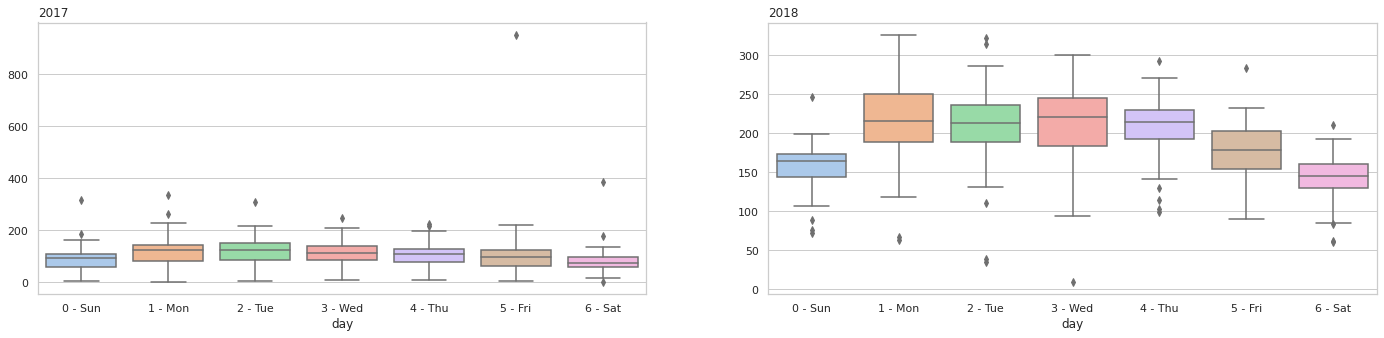

In [40]:
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 2, figsize=(24, 5))
sns.boxplot(data=df_17, ax=axs[0])
sns.boxplot(data=df_18, ax=axs[1])

axs[0].set_title("2017", loc='left')
axs[1].set_title("2018", loc='left')

Text(0.0, 1.0, 'Daily orders trend 2018')

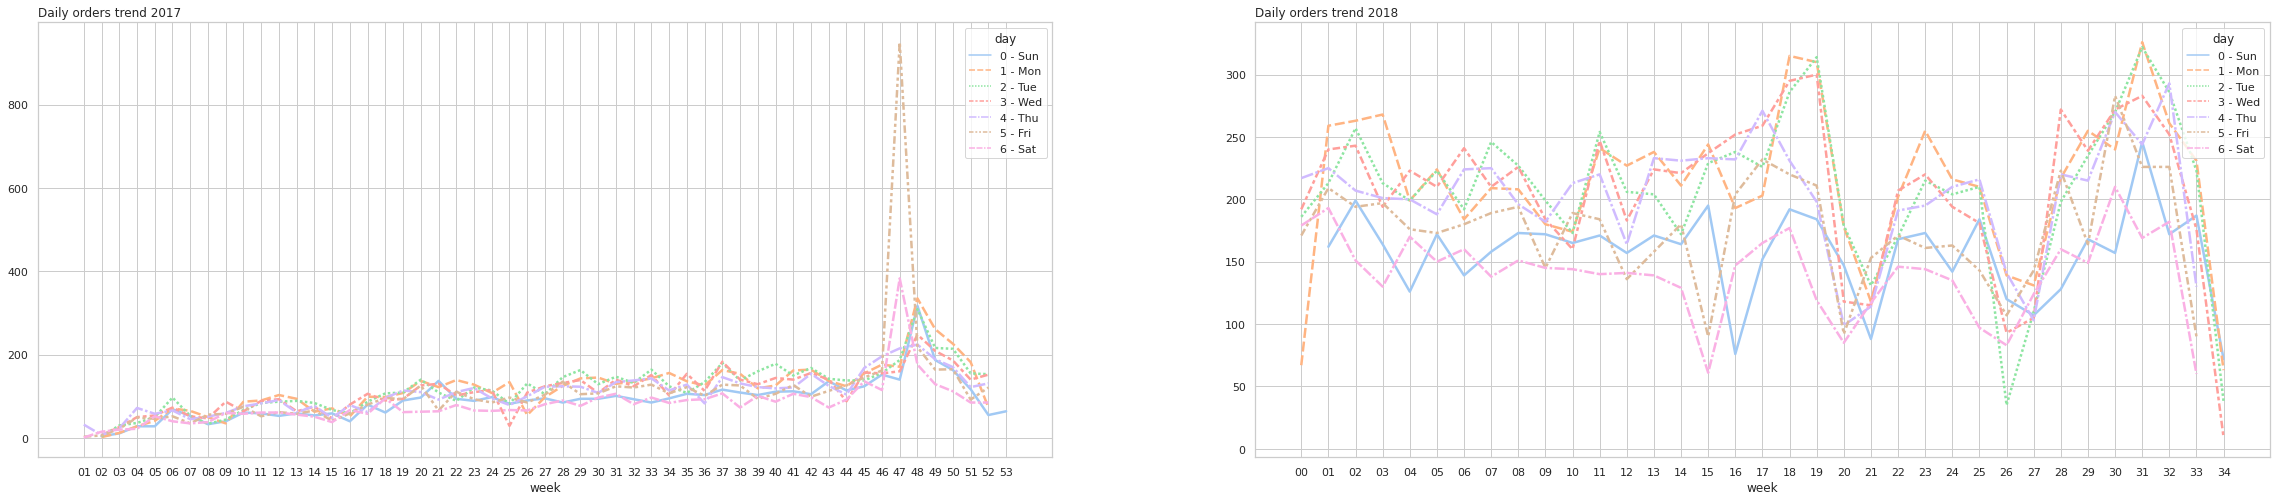

In [41]:
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 2, figsize=(40, 8))
sns.lineplot(data=df_17, lw=2.5, ax=axs[0])
sns.lineplot(data=df_18, lw=2.5, ax=axs[1])

axs[0].set_title("Daily orders trend 2017", loc='left')
axs[1].set_title("Daily orders trend 2018", loc='left')

Text(0.0, 1.0, 'Daily orders trend 2018')

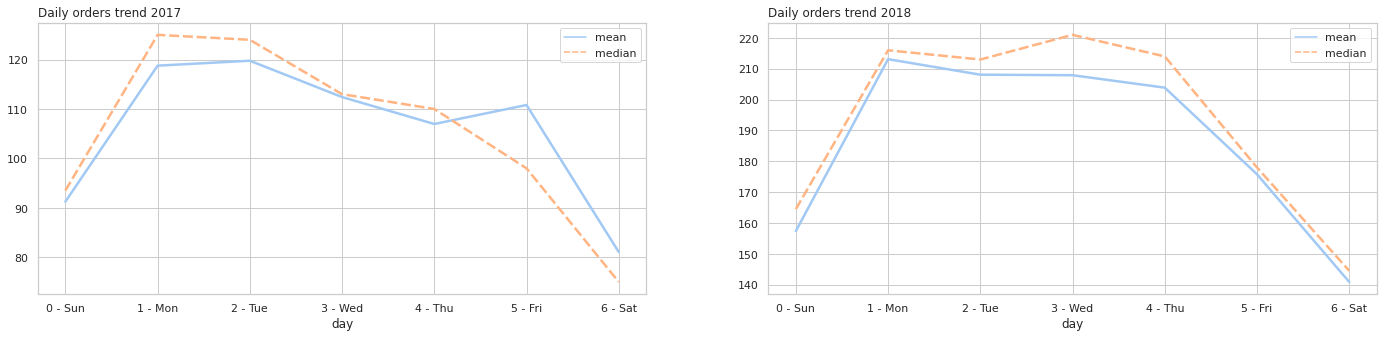

In [42]:
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 2, figsize=(24, 5))
sns.lineplot(data=(df_17.agg(['mean', 'median'])).T, lw=2.5, ax=axs[0])
sns.lineplot(data=(df_18.agg(['mean', 'median'])).T, lw=2.5, ax=axs[1])

axs[0].set_title("Daily orders trend 2017", loc='left')
axs[1].set_title("Daily orders trend 2018", loc='left')

#### Combined 2017 & 2018

In [43]:
df_comb = df_daily.groupby(by=['year', 'week', 'day'])
df_comb = df_comb['order_id'].agg('count')
df_comb = pd.DataFrame(df_comb)
df_comb = df_comb.reset_index()

cond = df_comb['year'] == '2018'
i = 0
for c in cond:
  if c:
    temp = int(df_comb['week'][i]) + 53
    df_comb['week'][i] = str(temp)
  i += 1
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      602 non-null    object
 1   week      602 non-null    object
 2   day       602 non-null    object
 3   order_id  602 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 18.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


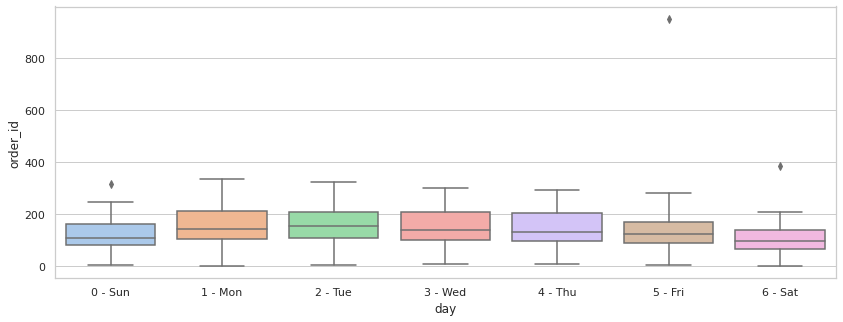

In [44]:
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 1, figsize=(14, 5))
sns.boxplot(data=df_comb.sort_values(by='day'), x='day', y='order_id')

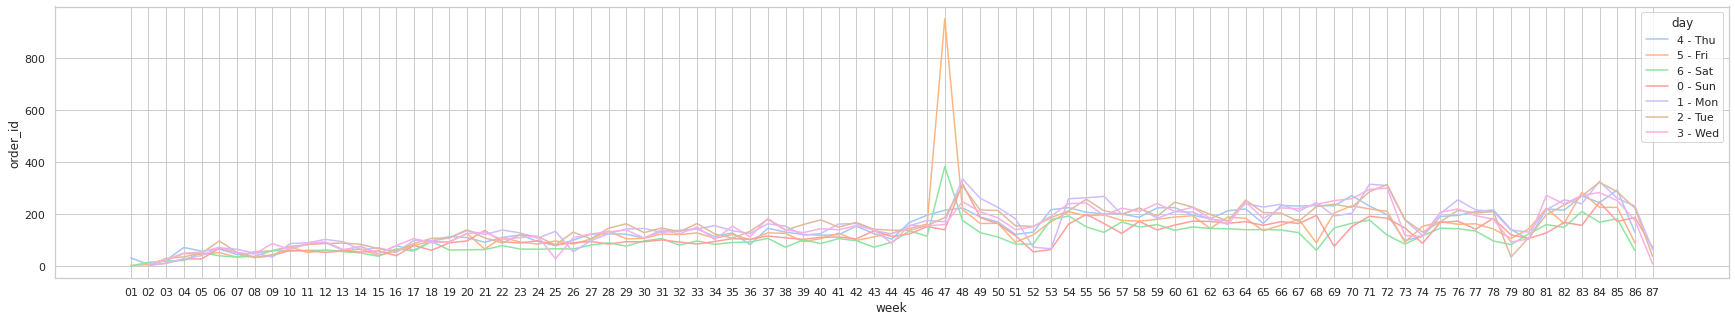

In [45]:
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 1, figsize=(30, 5))
sns.lineplot(data=df_comb.sort_values(by='week'), x='week', y='order_id', hue='day')

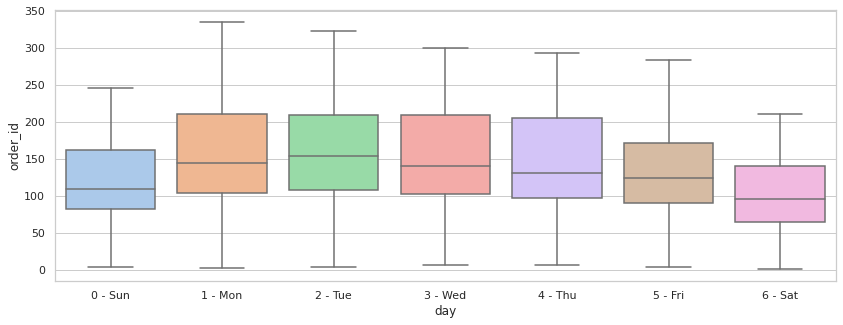

In [46]:
df_comb = df_comb[~((df_comb['day']=='0 - Sun') & (df_comb['order_id']>300))]
df_comb = df_comb[~((df_comb['day']=='6 - Sat') & (df_comb['order_id']>300))]
df_comb = df_comb[~((df_comb['day']=='5 - Fri') & (df_comb['order_id']>800))]

f, axs = plt.subplots(1, 1, figsize=(14, 5))
sns.boxplot(data=df_comb.sort_values(by='day'), x='day', y='order_id')

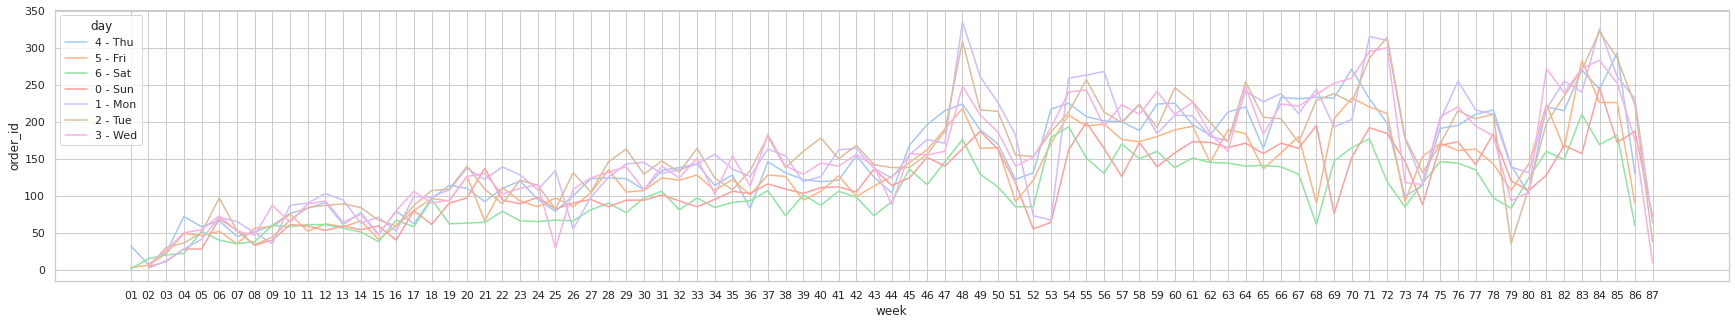

In [47]:
f, axs = plt.subplots(1, 1, figsize=(30, 5))
sns.lineplot(data=df_comb.sort_values(by='week'), x='week', y='order_id', hue='day')

In [48]:
temp = df_comb.groupby('day').agg(['mean', 'median'])['order_id']
temp

,mean,median
day,,
0 - Sun,115.047059,109.0
1 - Mon,157.162791,144.0
2 - Tue,155.709302,154.0
3 - Wed,151.279070,140.0
4 - Thu,145.279070,130.5
5 - Fri,126.929412,124.0
6 - Sat,101.435294,95.0


[Text(0, 0.5, 'Number of orders'),
 Text(0.5, 1.0, 'Average daily orders in a week')]

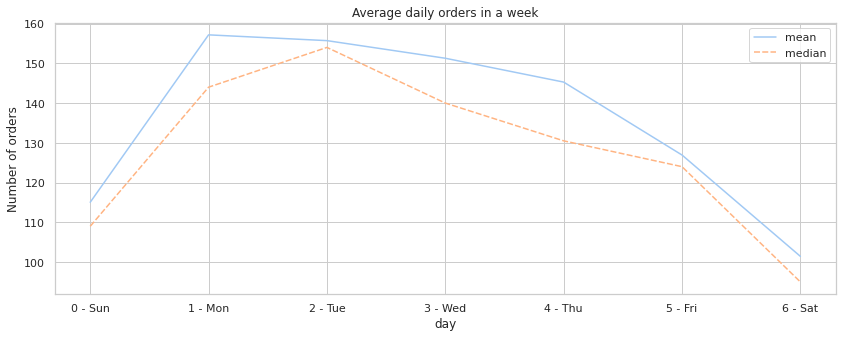

In [49]:
f, axs = plt.subplots(1, 1, figsize=(14, 5))
sns.lineplot(data=temp)
axs.set(title="Average daily orders in a week", ylabel="Number of orders")

### **3. Percentage of orders per payment type**

**Insight:**

* Most of the customer use credit card as their payment method (73.5%)
* Few customer use debit card (1.5%)

**Recommendation:**

* Cooperate or affiliate with more credit card providers

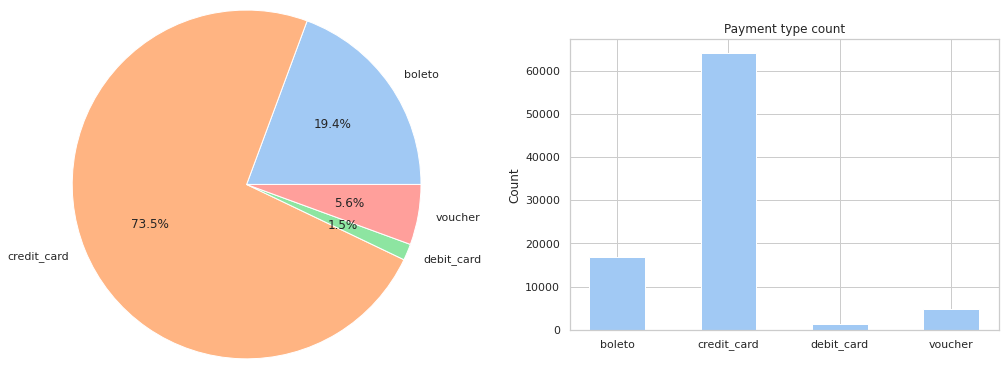

In [55]:
col_pay = (df.columns.tolist())[8:]
df_pt = df[col_pay].sum()
df_pt = pd.DataFrame(df_pt).reset_index()
df_pt = df_pt.rename(columns={'index': 'payment_type', 0: 'count'})
df_pt['payment_type'] = df_pt['payment_type'].str.replace("payment_type_", "")
df_pt['percentage'] = round(100*df_pt['count']/df_pt['count'].sum(), 2)
df_pt

,payment_type,count,percentage
0,boleto,16868,19.36
1,credit_card,64072,73.54
2,debit_card,1322,1.52
3,voucher,4865,5.58


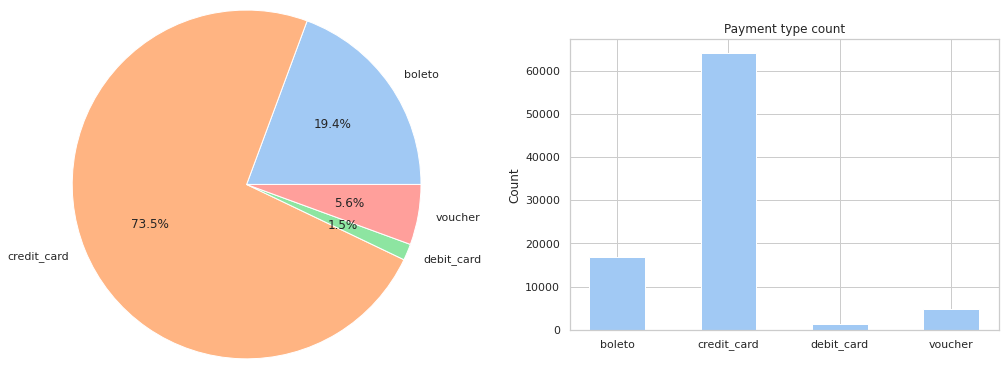

In [57]:
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

axs[0].pie(data=df_pt, x='count', labels='payment_type', autopct='%1.1f%%', radius=1.5)
axs[1].bar(df_pt['payment_type'], df_pt['count'], width=0.5)
axs[1].set(title="Payment type count", ylabel="Count")
plt.show()

### **4. Customer segmentation (cluster analysis)**

#### Variable selection and change categorical to numerical values
Also normalization using MinMaxScaler

In [58]:
df_cluster = df.copy()
col_day_hour = ['day_purchased', 'hour_purchased', 'day_delivered', 'hour_delivered']
col_payment_type = ['payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher']
df_cluster['day_purchased'] = df_cluster['order_purchase_timestamp'].dt.strftime('%w')
df_cluster['hour_purchased'] = df_cluster['order_purchase_timestamp'].dt.strftime('%H')
df_cluster['day_delivered'] = df_cluster['order_delivered_customer_date'].dt.strftime('%w')
df_cluster['hour_delivered'] = df_cluster['order_delivered_customer_date'].dt.strftime('%H')
df_cluster[col_day_hour] = df_cluster[col_day_hour].astype(int)
df_cluster[col_payment_type] = df_cluster[col_payment_type].astype(bool) * 1
df_cluster['state_code'] = df_cluster['customer_state'].astype('category').cat.codes
df_cluster.drop(columns=['customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'customer_city'], inplace=True)
df_cluster.head()

,order_id,actual_delivery_time,customer_state,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,day_purchased,hour_purchased,day_delivered,hour_delivered,state_code
0,e481f51cbdc54678b7cc49136f2d6af7,8,SP,38.71,0,1,0,1,1,10,2,21,25
1,53cdb2fc8bc7dce0b6741e2150273451,12,BA,141.46,1,0,0,0,2,20,2,15,4
2,47770eb9100c2d0c44946d9cf07ec65d,9,GO,179.12,0,1,0,0,3,8,5,18,8
3,949d5b44dbf5de918fe9c16f97b45f8a,13,RN,72.20,0,1,0,0,6,19,6,0,19
4,ad21c59c0840e6cb83a9ceb5573f8159,2,SP,28.62,0,1,0,0,2,21,5,18,25


In [59]:
col_num = (df_cluster.columns.tolist())[1:]
col_num.pop(1)
scaler = MinMaxScaler()
df_num = df_cluster.copy()
df_num[col_num] = scaler.fit_transform(df_num[col_num])
df_num.drop(columns=['order_id', 'customer_state'], inplace=True)
df_num.head()

,actual_delivery_time,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,day_purchased,hour_purchased,day_delivered,hour_delivered,state_code
0,0.285714,0.085695,0.0,1.0,0.0,1.0,0.166667,0.434783,0.333333,0.913043,0.961538
1,0.428571,0.388070,1.0,0.0,0.0,0.0,0.333333,0.869565,0.333333,0.652174,0.153846
2,0.321429,0.498896,0.0,1.0,0.0,0.0,0.500000,0.347826,0.833333,0.782609,0.307692
3,0.464286,0.184250,0.0,1.0,0.0,0.0,1.000000,0.826087,1.000000,0.000000,0.730769
4,0.071429,0.056002,0.0,1.0,0.0,0.0,0.333333,0.913043,0.833333,0.782609,0.961538


#### Cluster Analysis

In [103]:
chosen_1 = ['payment_value', 'day_purchased', 'hour_purchased', 'payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher']
chosen_2 = ['actual_delivery_time', 'day_delivered', 'hour_delivered', 'state_code']
chosen_3 = ['actual_delivery_time', 'day_delivered', 'hour_delivered', 'state_code', 'customer_state']

##### Clustering based on payment and purchasing time

###### Finding best k (it's found k=8)

In [66]:
X = df_num[chosen_1].copy()

In [ ]:
distortions = []
inertia_decrease = []
silhouette_array = []
K = range(1,13)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k)
  kmeanModel.fit(X)
  iner = kmeanModel.inertia_
  distortions.append(iner)
  if k!=K[0]:
    decrease = id - iner
    inertia_decrease.append(decrease)
    score = silhouette_score(X, kmeanModel.labels_)
    silhouette_array.append(score)
    print(k,  round(iner, 2),  round(decrease, 2), round(score, 2))
  id = iner

2 23217.66 26233.23 0.58
3 18368.63 4849.04 0.35
4 14821.28 3547.35 0.38
5 12614.38 2206.9 0.4
6 11297.14 1317.24 0.36
7 10189.16 1107.98 0.3
8 9107.24 1081.92 0.3
9 8258.22 849.02 0.29
10 7456.98 801.24 0.29
11 6896.83 560.15 0.3
12 6444.26 452.57 0.29


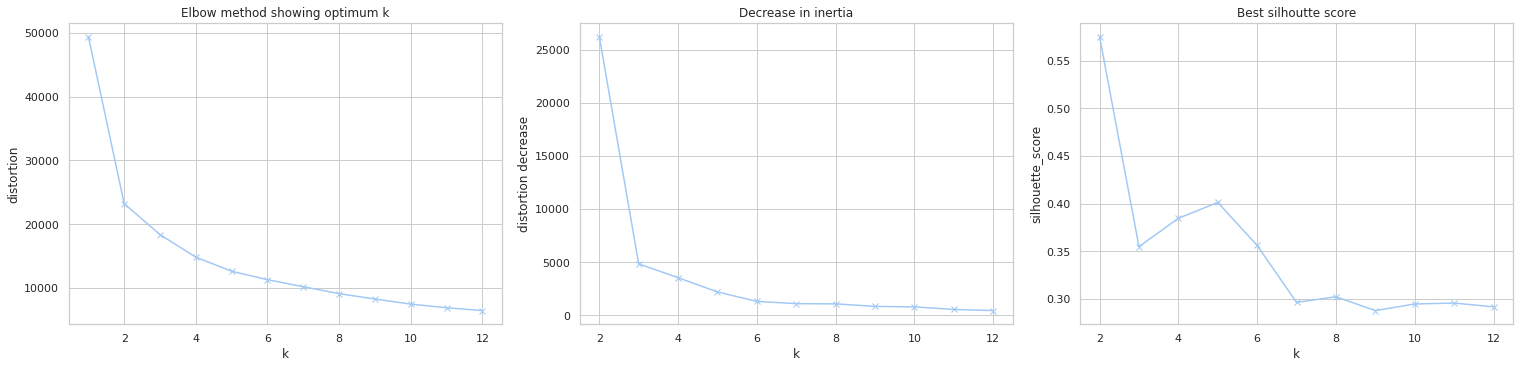

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(21, 5), constrained_layout=True)
axs[0].plot(K, distortions, 'bx-')
axs[0].set(title='Elbow method showing optimum k', xlabel='k', ylabel='distortion')
axs[1].plot(K[1:], inertia_decrease, 'bx-')
axs[1].set(title='Decrease in inertia', xlabel='k', ylabel='distortion decrease')
axs[2].plot(K[1:], silhouette_array, 'bx-')
axs[2].set(title='Best silhoutte score', xlabel='k', ylabel='silhouette_score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.575524218947098
For n_clusters = 5 The average silhouette_score is : 0.4012277629622604
For n_clusters = 8 The average silhouette_score is : 0.30202997727314185


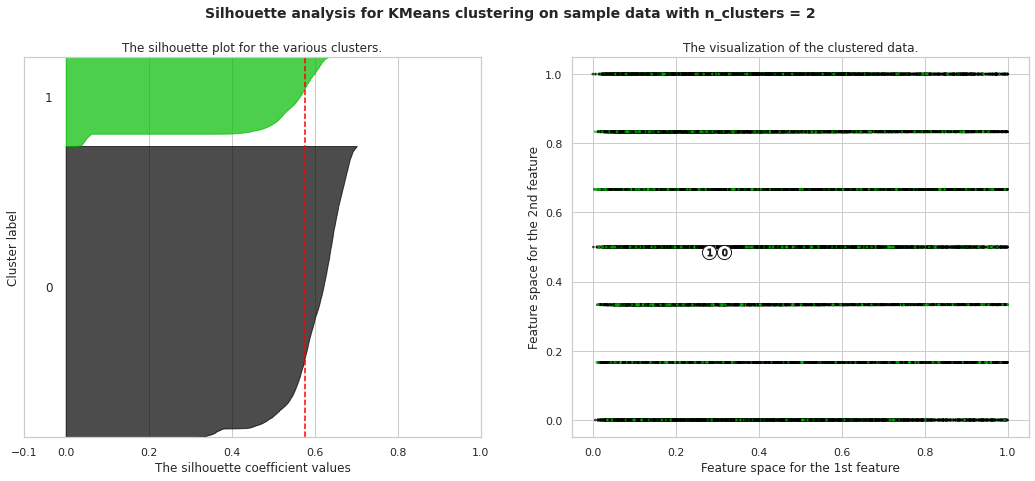

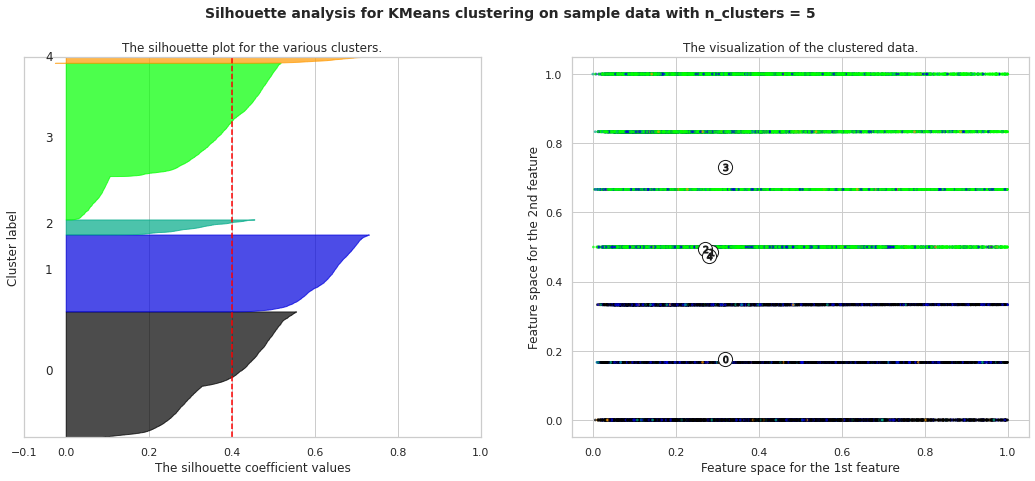

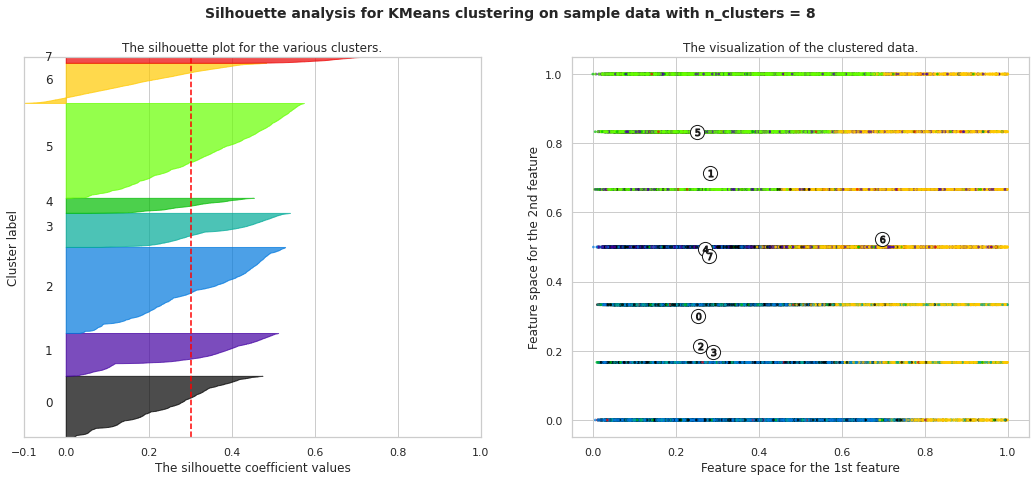

In [ ]:
silhoutte_analysis(X,[2, 5, 8])

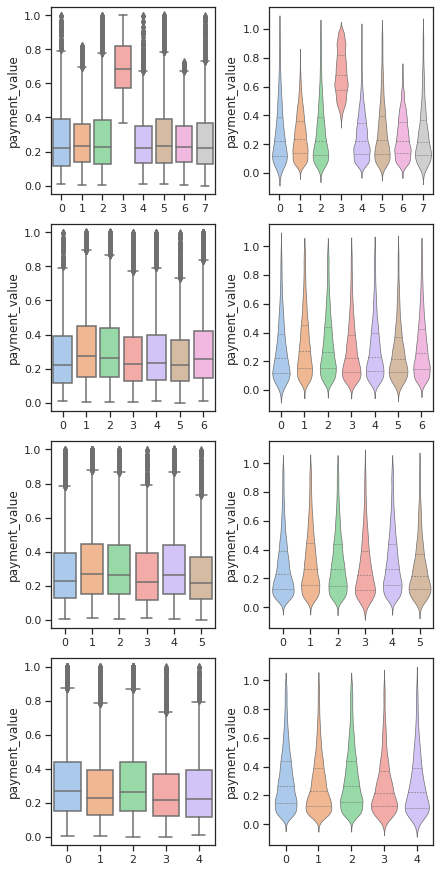

In [ ]:
K = [8, 7, 6, 5]
n = len(K)
sns.set_theme(style="ticks", palette="pastel")
f, axs = plt.subplots(n, 2, figsize=(6, 3*n), constrained_layout=True)

for i, k in enumerate(K):
  df_dummy = df_num[chosen_1].copy()
  cluster_model = cluster.KMeans(n_clusters=k)
  cluster_array = cluster_model.fit(df_dummy)
  df_dummy['cluster'] = cluster_model.labels_
  sns.boxplot(x=cluster_model.labels_, y=df_dummy['payment_value'], ax=axs[i][0])
  sns.violinplot(x=cluster_model.labels_, y=df_dummy['payment_value'], inner="quart", linewidth=0.7, ax=axs[i][1])

###### Cluster Result

In [80]:
k = 8
X = df_num[chosen_1].copy()
df_result = df_cluster[chosen_1].copy()

cluster_model = cluster.KMeans(n_clusters=k)
cluster_array = cluster_model.fit(X)
df_result['cluster'] = cluster_model.labels_
round(df_result.groupby('cluster').agg(['mean']).T, 2)

,cluster,0,1,2,3,4,5,6,7
payment_value,mean,95.21,107.74,95.36,104.63,101.51,105.33,98.06,246.14
day_purchased,mean,5.00,1.18,1.73,2.85,2.97,4.28,1.32,3.15
hour_purchased,mean,14.76,14.69,9.68,14.61,14.92,14.00,18.89,15.39
payment_type_boleto,mean,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
payment_type_credit_card,mean,1.00,0.00,1.00,0.00,0.58,0.00,1.00,1.00
payment_type_debit_card,mean,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
payment_type_voucher,mean,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [81]:
round(df_result.groupby('cluster').agg(['min','mean','max','count'])['payment_value'].T, 0)

cluster,0,1,2,3,4,5,6,7
min,11.0,13.0,13.0,13.0,10.0,12.0,10.0,134.0
mean,95.0,108.0,95.0,105.0,102.0,105.0,98.0,246.0
max,259.0,349.0,348.0,348.0,348.0,348.0,289.0,349.0
count,20791.0,7471.0,14091.0,1320.0,3293.0,9397.0,18304.0,8777.0


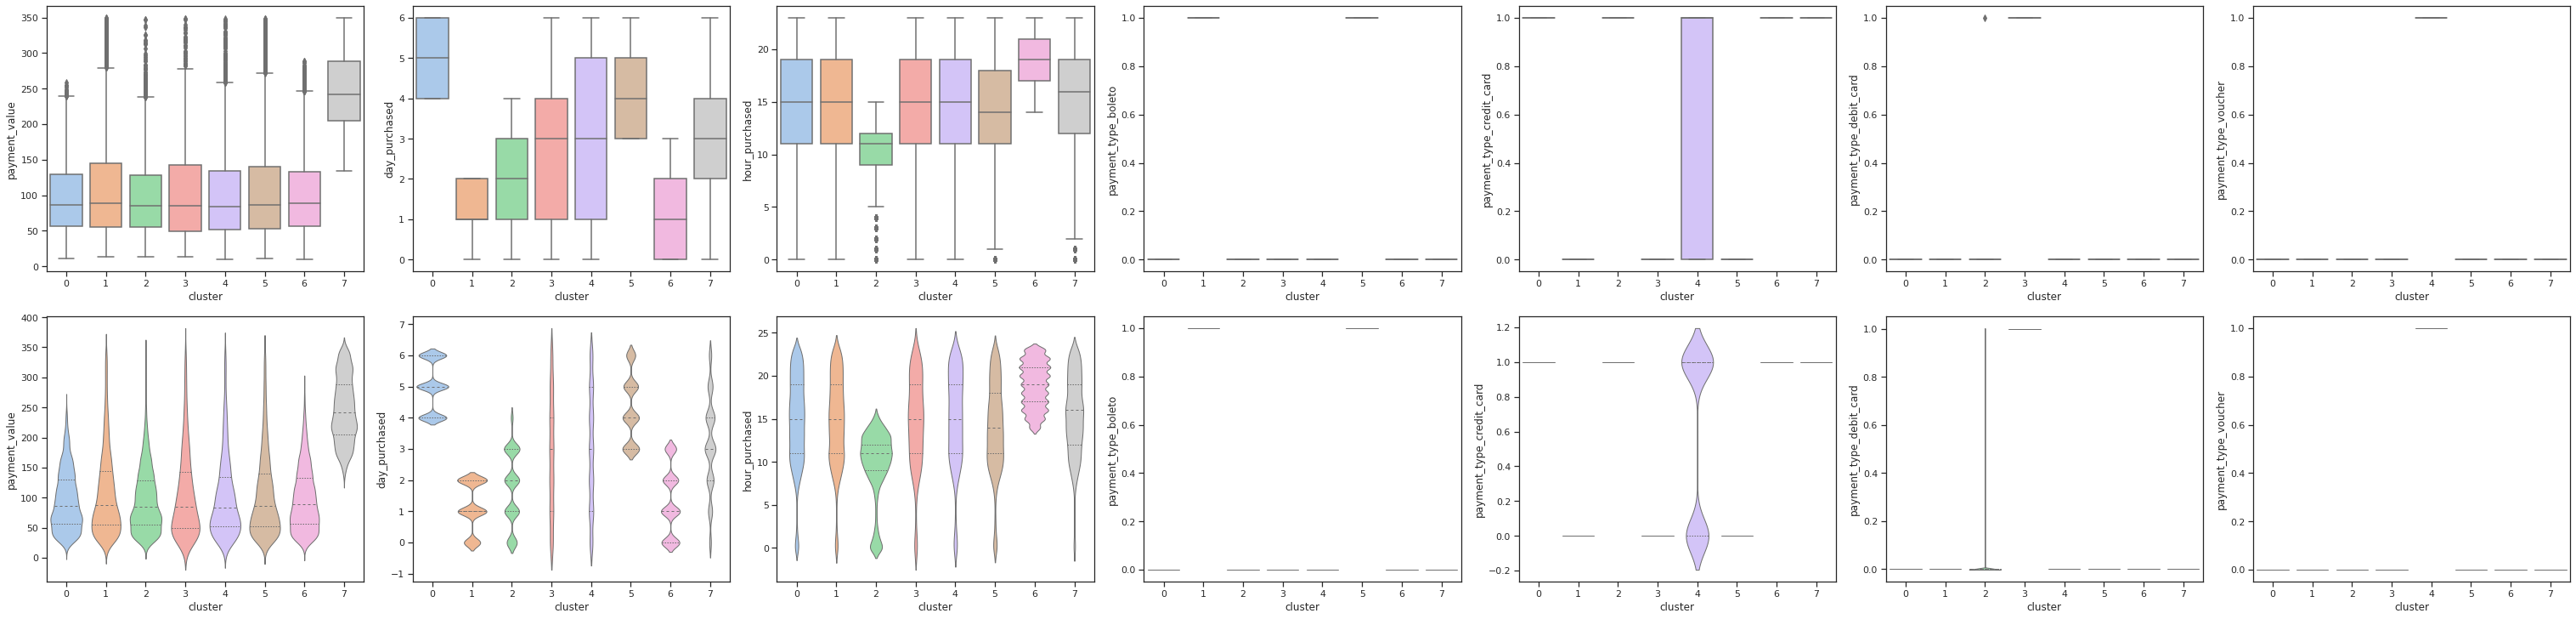

In [83]:
col_all = df_result.columns.tolist()
col_all = col_all[:-1]
n = len(col_all)

sns.set_theme(style="ticks", palette="pastel")
f, axs = plt.subplots(2, n, figsize=(6*n, 10), constrained_layout=True)

for i, c in enumerate(col_all):
  sns.boxplot(x="cluster", y=c, data=df_result, ax=axs[0][i])
  sns.violinplot(data=df_result, x="cluster", y=c, inner="quart", linewidth=1, ax=axs[1][i])

##### Clustering based on delivery time and state

###### Finding best k (it's found k=6)

In [84]:
X = df_num[chosen_2].copy()

In [ ]:
distortions = []
inertia_decrease = []
silhouette_array = []
K = range(1,13)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k)
  kmeanModel.fit(X)
  iner = kmeanModel.inertia_
  distortions.append(iner)
  if k!=K[0]:
    decrease = id - iner
    inertia_decrease.append(decrease)
    score = silhouette_score(X, kmeanModel.labels_)
    silhouette_array.append(score)
    print(k,  round(iner, 2),  round(decrease, 2), round(score, 2))
  id = iner

2 14637.42 5318.82 0.29
3 11511.48 3125.94 0.27
4 9637.26 1874.23 0.29
5 8472.77 1164.49 0.29
6 7471.64 1001.13 0.29
7 6950.5 521.14 0.26
8 6521.36 429.14 0.23
9 6106.21 415.15 0.24
10 5721.8 384.41 0.24
11 5397.45 324.35 0.23
12 5148.77 248.68 0.24


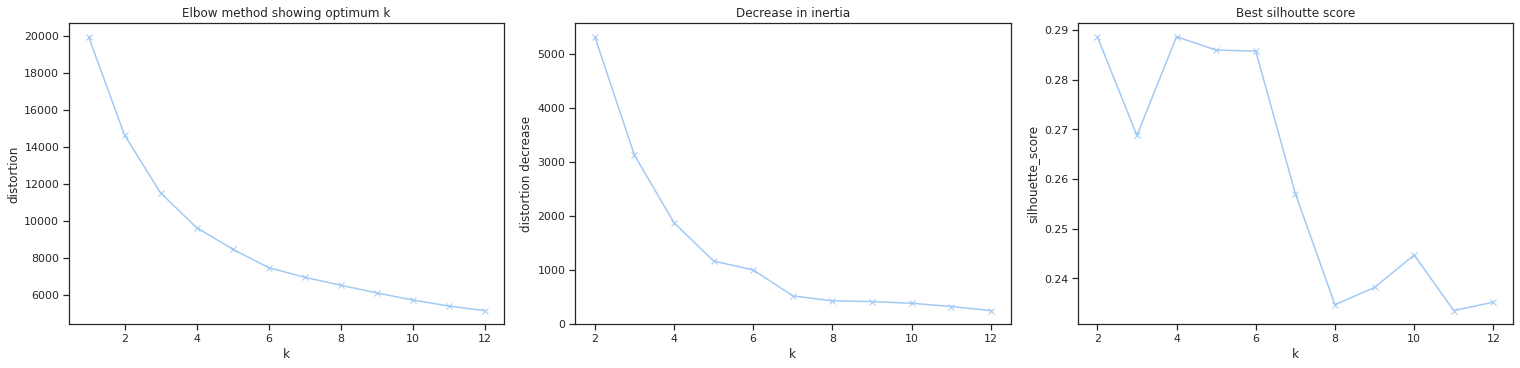

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(21, 5), constrained_layout=True)
axs[0].plot(K, distortions, 'bx-')
axs[0].set(title='Elbow method showing optimum k', xlabel='k', ylabel='distortion')
axs[1].plot(K[1:], inertia_decrease, 'bx-')
axs[1].set(title='Decrease in inertia', xlabel='k', ylabel='distortion decrease')
axs[2].plot(K[1:], silhouette_array, 'bx-')
axs[2].set(title='Best silhoutte score', xlabel='k', ylabel='silhouette_score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2887167862676857
For n_clusters = 4 The average silhouette_score is : 0.2886260830454187
For n_clusters = 5 The average silhouette_score is : 0.2855967712515519
For n_clusters = 6 The average silhouette_score is : 0.28608268041783136
For n_clusters = 7 The average silhouette_score is : 0.2574758103699223


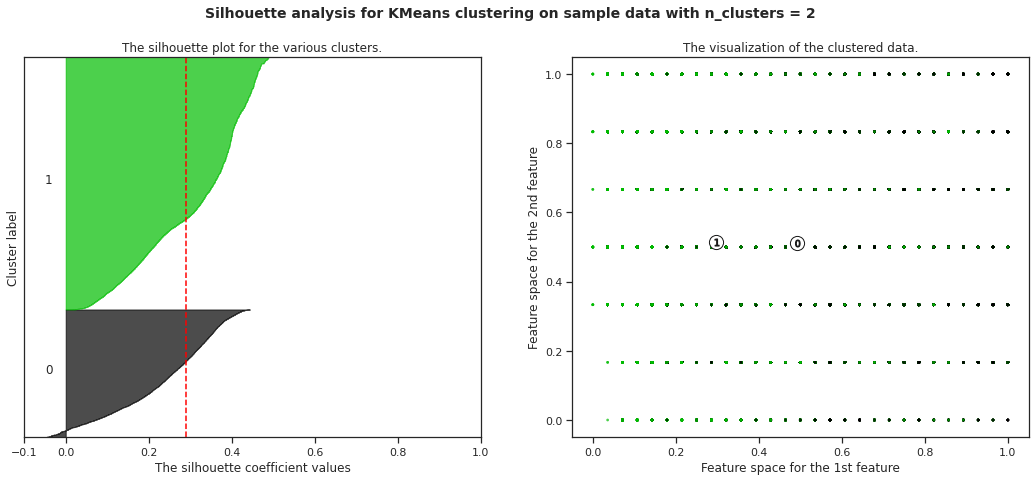

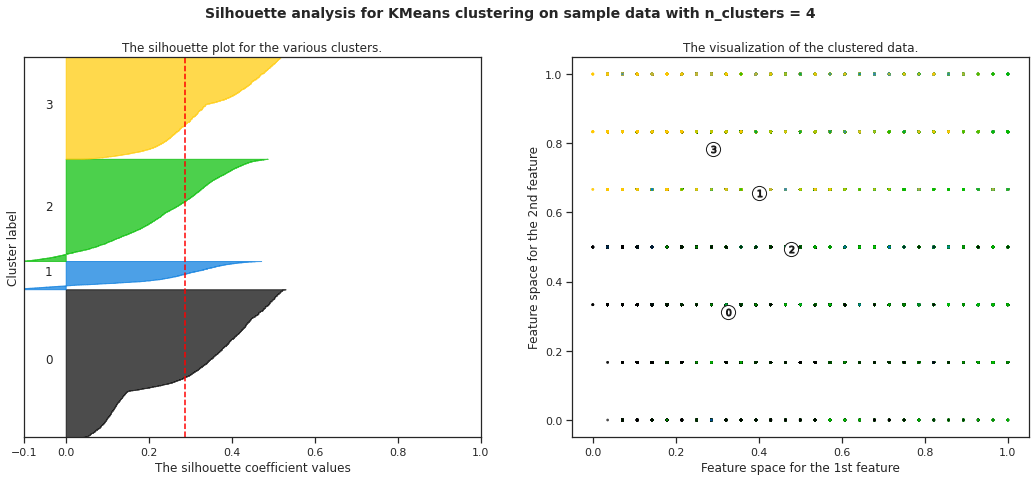

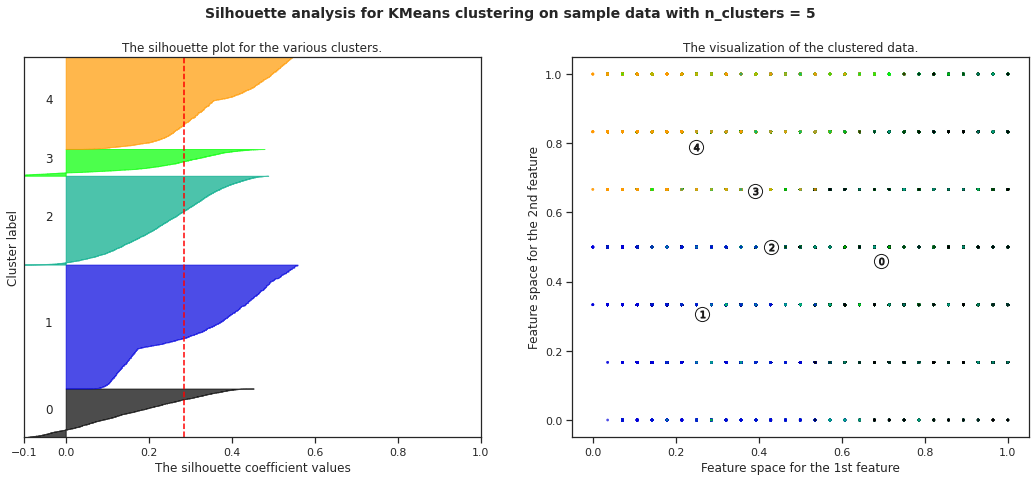

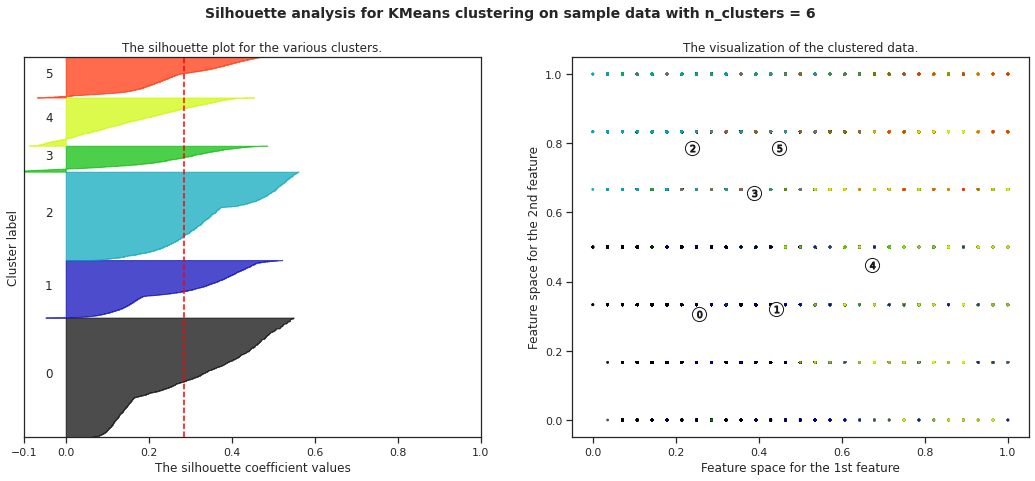

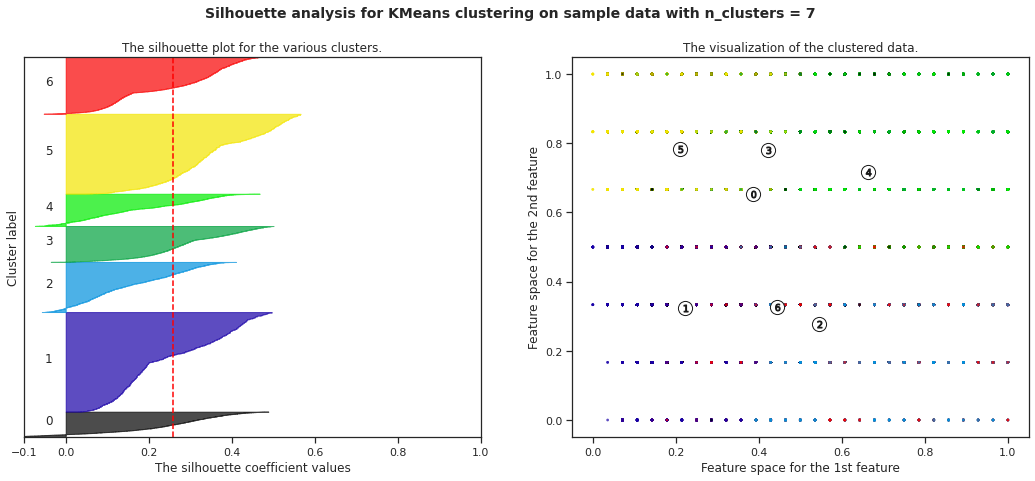

In [ ]:
silhoutte_analysis(X,[2,4,5,6,7])

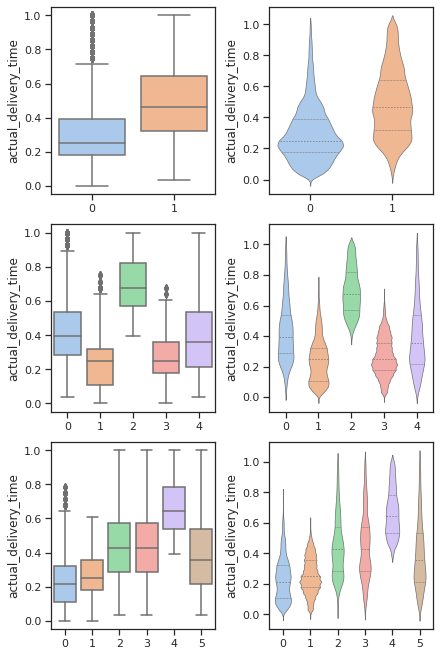

In [ ]:
K = [2,5,6]
n = len(K)
sns.set_theme(style="ticks", palette="pastel")
f, axs = plt.subplots(n, 2, figsize=(6, 3*n), constrained_layout=True)

for i, k in enumerate(K):
  df_dummy = df_num[chosen_2].copy()
  cluster_model = cluster.KMeans(n_clusters=k)
  cluster_array = cluster_model.fit(df_dummy)
  sns.boxplot(x=cluster_model.labels_, y=df_dummy['actual_delivery_time'], ax=axs[i][0])
  sns.violinplot(x=cluster_model.labels_, y=df_dummy['actual_delivery_time'], inner="quart", linewidth=0.7, ax=axs[i][1])

###### Cluster Result

In [104]:
k = 6
X = df_num[chosen_2].copy()
df_result = df_cluster[chosen_3].copy()

cluster_model = cluster.KMeans(n_clusters=k)
cluster_array = cluster_model.fit(X)
df_result['cluster'] = cluster_model.labels_
round(df_result.groupby('cluster').agg(['mean']).T, 2)

,cluster,0,1,2,3,4,5
actual_delivery_time,mean,7.17,12.55,6.70,18.85,12.35,10.89
day_delivered,mean,1.84,4.72,4.71,2.68,1.93,3.93
hour_delivered,mean,17.26,17.10,17.14,17.56,17.49,2.03
state_code,mean,23.20,9.24,23.36,20.66,8.59,18.74


In [105]:
round(df_result.groupby('cluster').agg(['min','mean','max','count'])['actual_delivery_time'].T, 0)

cluster,0,1,2,3,4,5
min,0.0,1.0,0.0,11.0,1.0,1.0
mean,7.0,13.0,7.0,19.0,12.0,11.0
max,17.0,28.0,22.0,28.0,28.0,28.0
count,26264.0,8923.0,19395.0,10561.0,12611.0,5690.0


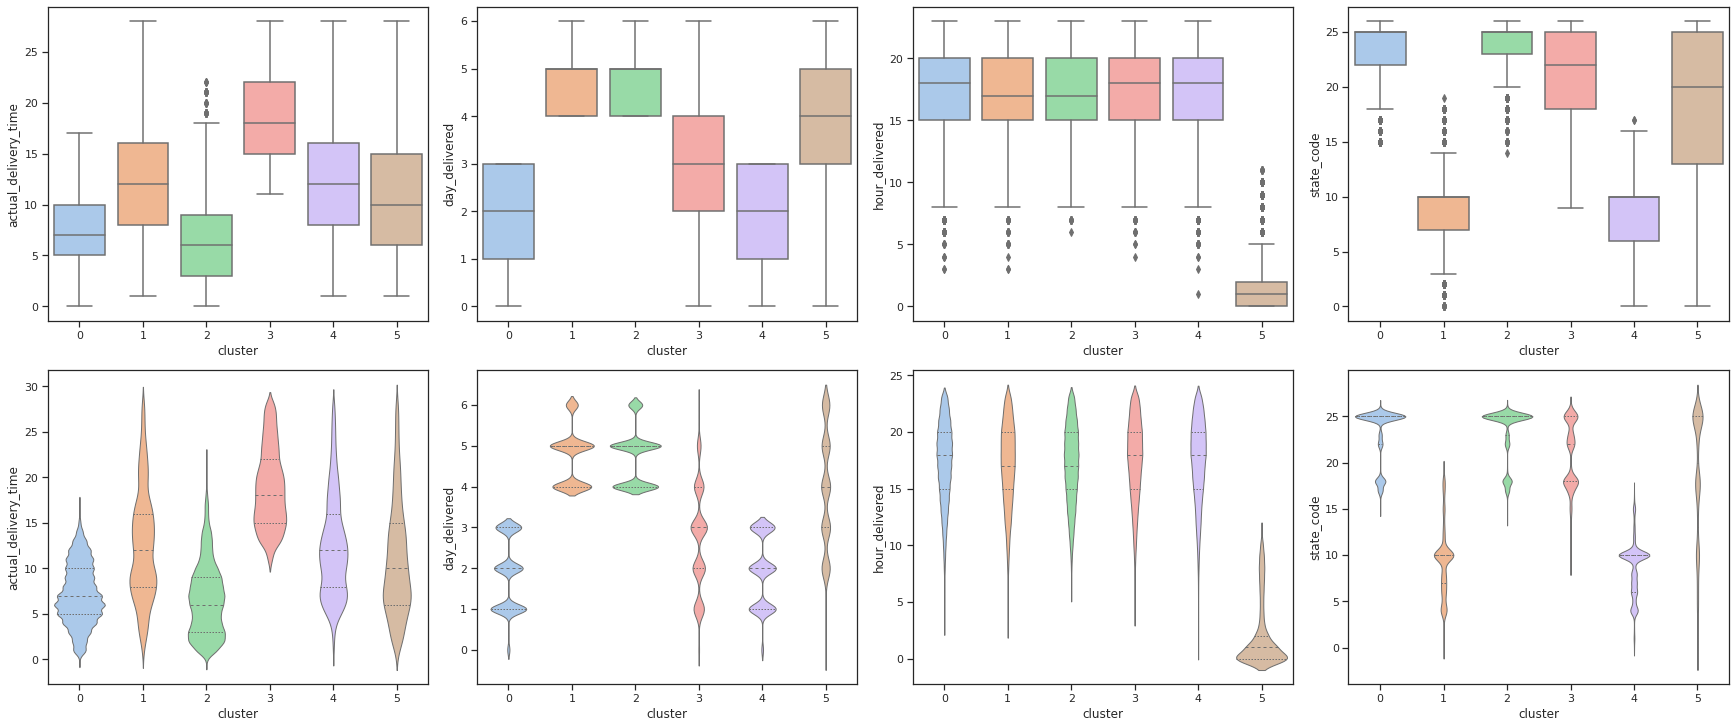

In [106]:
col_all = df_result.columns.tolist()
col_all = col_all[:-2]
n = len(col_all)

sns.set_theme(style="ticks", palette="pastel")
f, axs = plt.subplots(2, n, figsize=(6*n, 10), constrained_layout=True)

for i, c in enumerate(col_all):
  sns.boxplot(x="cluster", y=c, data=df_result, ax=axs[0][i])
  sns.violinplot(data=df_result, x="cluster", y=c, inner="quart", linewidth=1, ax=axs[1][i])

In [118]:
A = pd.DataFrame(df_result[['state_code','customer_state']].value_counts()).reset_index()
print(A[['state_code','customer_state']].sort_values('state_code'))

    state_code customer_state
24           0             AC
20           1             AL
23           2             AM
25           3             AP
6            4             BA
11           5             CE
7            6             DF
8            7             ES
9            8             GO
15           9             MA
2           10             MG
14          11             MS
12          12             MT
13          13             PA
18          14             PB
10          15             PE
17          16             PI
4           17             PR
1           18             RJ
16          19             RN
22          20             RO
26          21             RR
3           22             RS
5           23             SC
19          24             SE
0           25             SP
21          26             TO


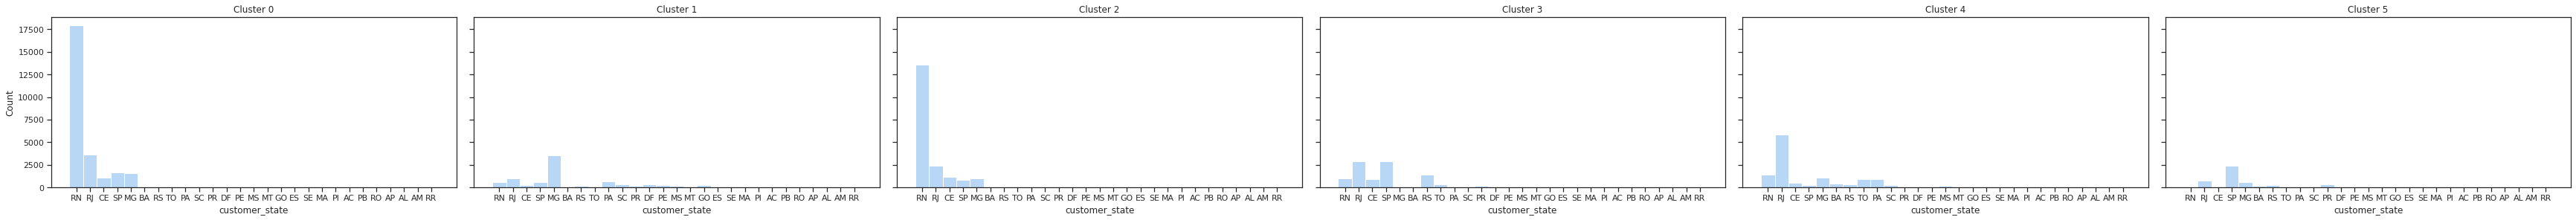

In [108]:
sns.set_theme(style="ticks", palette="pastel")
f, axs = plt.subplots(1, k, figsize=(8*k, 4), constrained_layout=True, sharex=True, sharey=True)

for i in range(k):
  temp = df_result[df_result['cluster']==i]
  sns.histplot(data=temp, x="customer_state", ax=axs[i])
  axs[i].set(title="Cluster "+str(i))